In [1]:
#for data analysis
import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd

#for visualistions
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("darkgrid")
sns.set_palette(palette='Paired')

#for data preprocessing and preperation
from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#for defining models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#for model evaluation
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report


#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/brainstoke/brain_stroke.csv') #import csv

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
fig_num=0

In [5]:
df.head() #display first five rows of df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
df.info() #df information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
for col in (df.select_dtypes(exclude=['float'])).columns:
    print(f"Categories of the '{col}' column: {df[col].unique()}")

Categories of the 'gender' column: ['Male' 'Female']
Categories of the 'hypertension' column: [0 1]
Categories of the 'heart_disease' column: [1 0]
Categories of the 'ever_married' column: ['Yes' 'No']
Categories of the 'work_type' column: ['Private' 'Self-employed' 'Govt_job' 'children']
Categories of the 'Residence_type' column: ['Urban' 'Rural']
Categories of the 'smoking_status' column: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Categories of the 'stroke' column: [1 0]


In [8]:
#create data dictionary including variable name and data types
data_dict = pd.DataFrame({'Variable': df.columns, 'Data Type': [df[col].dtype for col in df.columns]})

#write variable descriptions
data_dict['Description'] = [
    'Gender of patient\nFemale, Male',
    'Age of patient (years)',
    '0 = does not have hypertention\n1 = has hypertension',
    '0 = does not have hear disease\n1 = has heart disease',
    'Marriage History\nYes(been or is married)\nNo(never married)',
    'Type of Work-\nPrivate: work for private firm\nSelf-employed\nGovt_job: work for government\nchildren: is a child (no work)',
    'Type of Residence Area\nUrban, Rural',
    'Average Glucose Level of patient (mg/dL)',
    'Body Mass Index',
    'Smoking Status of patient\nSmokes, Unknown, Former Smoker, Never Smoked',
    'Stroke History\n0 = has not had a stroke\n1 = has had a stroke'
]



In [ ]:
data_dict = data_dict.style.set_properties(subset=['Description'], **{'width': '600px'})
data_dict #display dataframe

,Variable,Data Type,Description
0,gender,object,"Gender of patient Female, Male"
1,age,float64,Age of patient (years)
2,hypertension,int64,0 = does not have hypertention 1 = has hypertension
3,heart_disease,int64,0 = does not have hear disease 1 = has heart disease
4,ever_married,object,Marriage History Yes(been or is married) No(never married)
5,work_type,object,Type of Work- Private: work for private firm Self-employed Govt_job: work for government children: is a child (no work)
6,Residence_type,object,"Type of Residence Area Urban, Rural"
7,avg_glucose_level,float64,Average Glucose Level of patient (mg/dL)
8,bmi,float64,Body Mass Index
9,smoking_status,object,"Smoking Status of patient Smokes, Unknown, Former Smoker, Never Smoked"


In [ ]:
df.info() #df information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
for column in df.columns:
    count = (df[column] == 0).sum()
    print(
        f"Count of zeros in the '{column}' column: {count}\n\
This is {round(100*count/len(df[column]),2)}% of the data\n"
    )

Count of zeros in the 'gender' column: 0
This is 0.0% of the data

Count of zeros in the 'age' column: 0
This is 0.0% of the data

Count of zeros in the 'hypertension' column: 4502
This is 90.38% of the data

Count of zeros in the 'heart_disease' column: 4706
This is 94.48% of the data

Count of zeros in the 'ever_married' column: 0
This is 0.0% of the data

Count of zeros in the 'work_type' column: 0
This is 0.0% of the data

Count of zeros in the 'Residence_type' column: 0
This is 0.0% of the data

Count of zeros in the 'avg_glucose_level' column: 0
This is 0.0% of the data

Count of zeros in the 'bmi' column: 0
This is 0.0% of the data

Count of zeros in the 'smoking_status' column: 0
This is 0.0% of the data

Count of zeros in the 'stroke' column: 4733
This is 95.02% of the data



In [ ]:
#make list of all numerical columns
num_cols = df.select_dtypes(include ='float').keys()
num_cols

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

In [ ]:
#make list of categorical columns with the object datatype
cat_cols_object = df.select_dtypes(include ='object' or 'int64').keys()
cat_cols_object

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
cat_cols_binary = df.select_dtypes(include = 'int64').keys()
cat_cols_binary

Index(['hypertension', 'heart_disease', 'stroke'], dtype='object')

In [ ]:
cat_variables = cat_cols_object.append(cat_cols_binary)
cat_variables

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'hypertension', 'heart_disease', 'stroke'],
      dtype='object')

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
len(df[(df['age'] <= 15)])

722

In [ ]:
len(df[(df['age'] <= 15) & (df['smoking_status'].isin(['smokes','formerly smoked']))])

22

In [ ]:
100*len(df[(df['age'] <= 15) & (df['smoking_status'].isin(['smokes','formerly smoked']))])/len(df)

0.44167837783577596

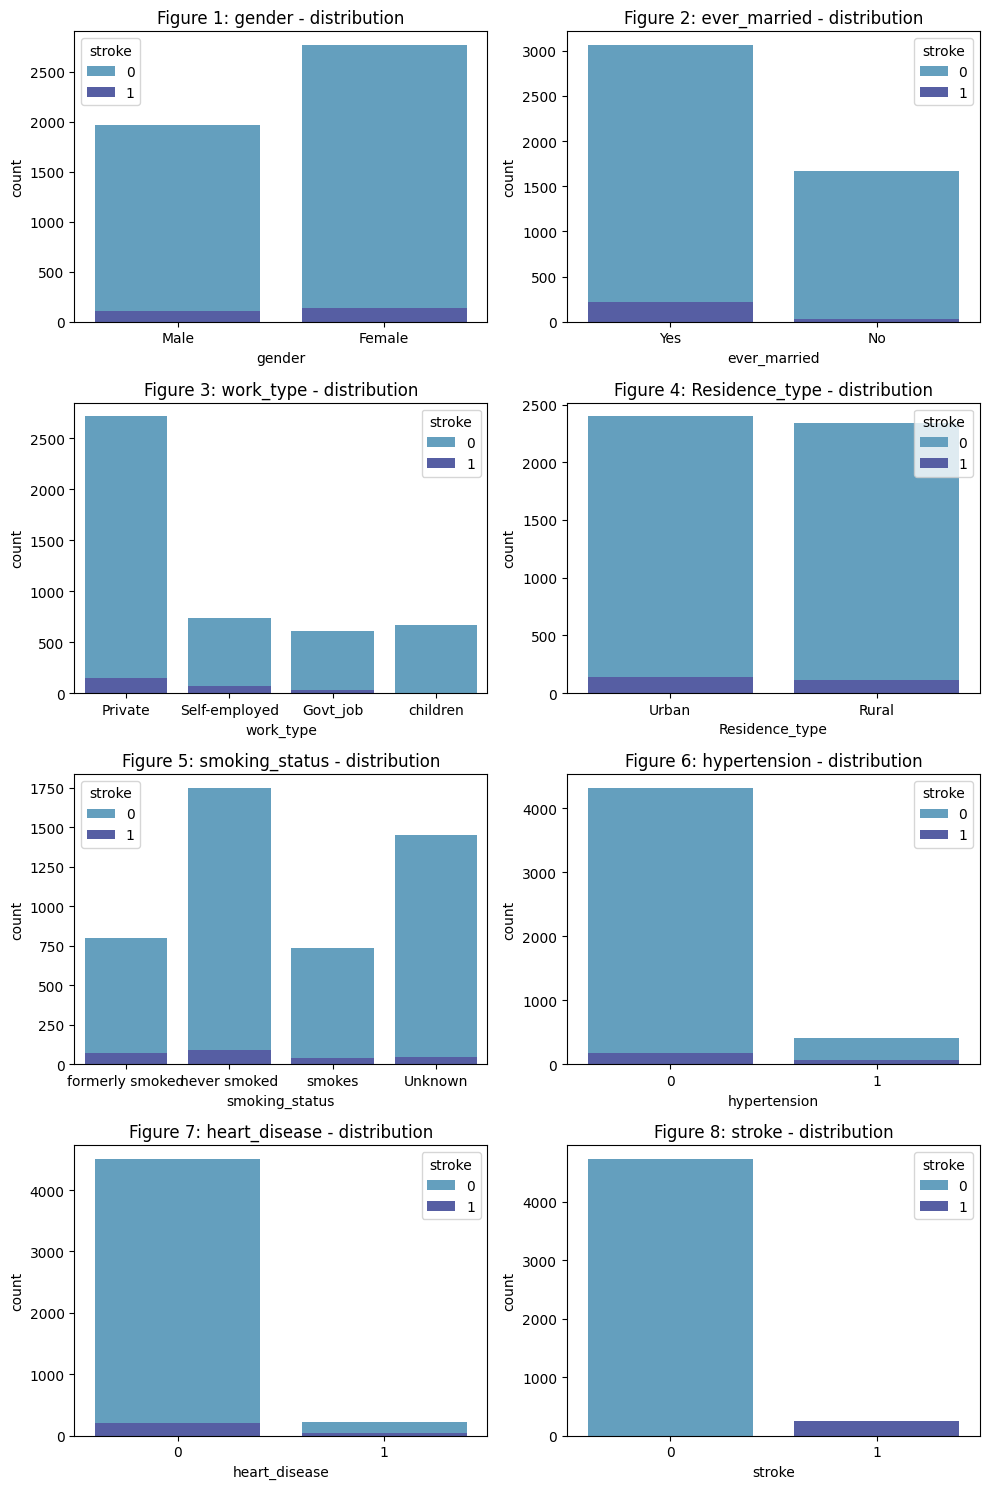

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) #define subplot parameters
axes = axes.flatten() #flatten the axes array to make it easier to iterate over
sns.set_palette('icefire') #set colour palette

#iterate over each categorical column of the dataframe, creating a subplot
for i, col in enumerate(df[cat_variables]):
    sns.countplot(x=col, hue='stroke', data=df, ax=axes[i], dodge=False)
    axes[i].set_title(col)
    fig_num +=1
    axes[i].set_title(f"Figure {fig_num}: {col} - distribution")

plt.tight_layout() #fix layout
plt.show() #display subplots

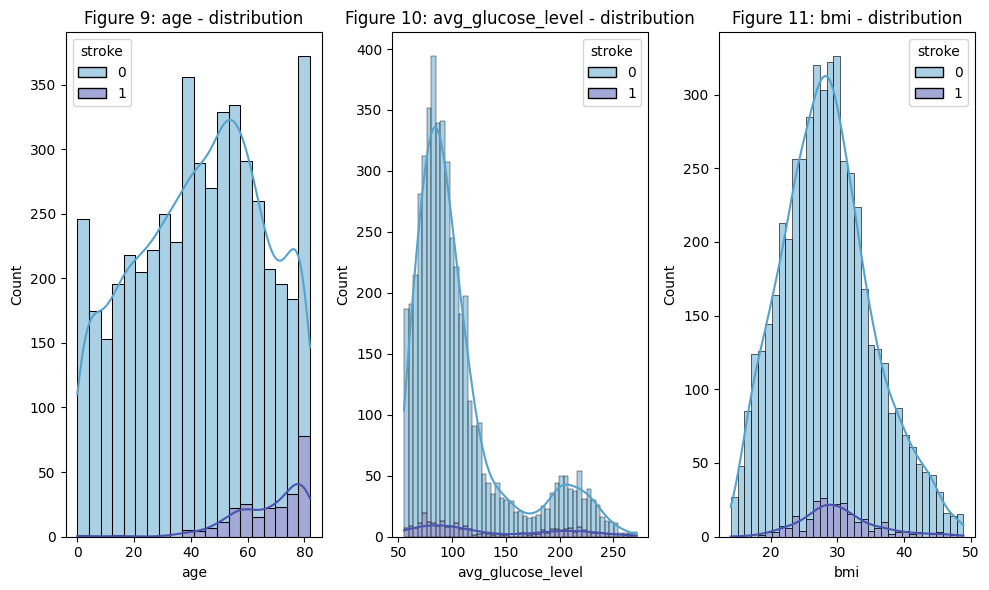

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6)) #define subplot parameters
axes = axes.flatten() #flatten the axes array to make it easier to iterate over
sns.set_palette('icefire') #set colour palette


#iterate over each numerical column of the dataframe, creating a subplot
for i, col in enumerate(df[num_cols]):
    sns.histplot(x=col, hue='stroke', data=df, ax=axes[i], kde=True, multiple='stack')
    axes[i].set_title(col)
    fig_num +=1
    axes[i].set_title(f"Figure {fig_num}: {col} - distribution")

plt.tight_layout() #fix layout
plt.show() #display subplots

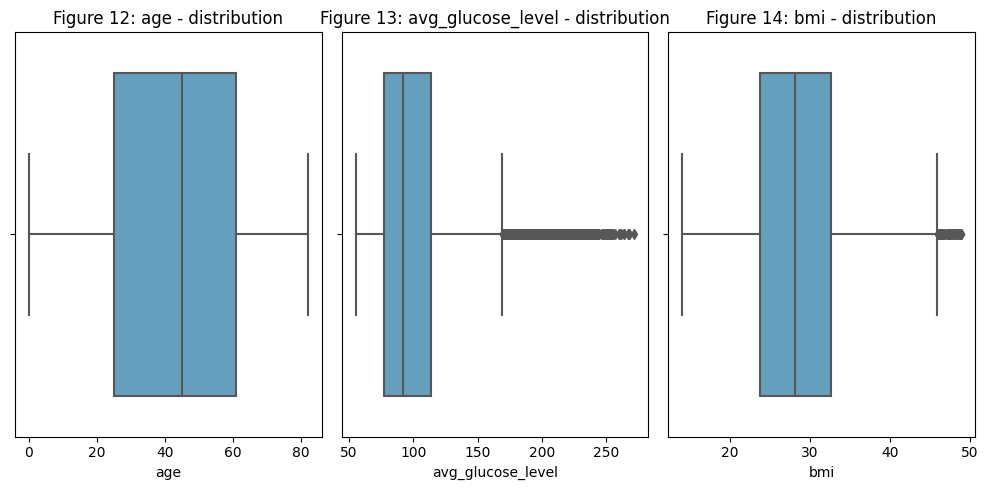

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5)) #define subplot parameters
axes = axes.flatten() #flatten the axes array to make it easier to iterate over
sns.set_palette('icefire') #set colour palette


#iterate over each numerical column of the dataframe, creating a subplot
for i, col in enumerate(df[num_cols]):
    sns.boxplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    fig_num +=1
    axes[i].set_title(f"Figure {fig_num}: {col} - distribution")

plt.tight_layout() #fix layout
plt.show() #display subplots

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)

#fit and transform the categorical columns using OneHotEncoder
df_encoded = pd.DataFrame(
    onehot_encoder.fit_transform(df[cat_cols_object]),
    columns = onehot_encoder.get_feature_names_out(cat_cols_object)
)

# Concatenate the one hot encoded columns with the original dataframe
df_encoded = pd.concat(
    [df.drop(columns = cat_cols_object), df_encoded],
    axis = 1
)

df_encoded.head() #display first five rows of new dataframe

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,81.0,0,0,186.21,29.0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df_encoded.shape #df shape after applied changes

(4981, 20)

In [ ]:
df_encoded.corr().style.background_gradient(cmap='coolwarm') #correlation of all variables

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478,0.026538,-0.026538,-0.677137,0.677137,0.126868,0.111020,0.326835,-0.636866,-0.017155,0.017155,-0.379669,0.235508,0.122617,0.070899
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965,-0.021485,0.021485,-0.164534,0.164534,0.016378,-0.004177,0.110468,-0.128924,0.004755,-0.004755,-0.139901,0.056797,0.065267,0.030749
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610,-0.086476,0.086476,-0.114765,0.114765,0.001166,-0.001600,0.087474,-0.092974,-0.002125,0.002125,-0.066710,0.067541,-0.022727,0.044011
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227,-0.055796,0.055796,-0.150724,0.150724,0.009223,0.020764,0.058419,-0.101960,-0.001346,0.001346,-0.095504,0.066989,0.024727,0.017873
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926,0.012093,-0.012093,-0.371690,0.371690,0.087375,0.211820,0.085582,-0.484257,-0.013185,0.013185,-0.293912,0.120156,0.109322,0.100710
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000,-0.008870,0.008870,-0.108398,0.108398,0.002574,0.010459,0.062643,-0.085075,-0.016494,0.016494,-0.055699,0.065320,-0.004806,0.008561
gender_Female,0.026538,-0.021485,-0.086476,-0.055796,0.012093,-0.008870,1.000000,-1.000000,-0.028971,0.028971,0.017176,0.028706,0.029635,-0.090275,-0.004301,0.004301,-0.059858,-0.045109,0.102387,-0.013349
gender_Male,-0.026538,0.021485,0.086476,0.055796,-0.012093,0.008870,-1.000000,1.000000,0.028971,-0.028971,-0.017176,-0.028706,-0.029635,0.090275,0.004301,-0.004301,0.059858,0.045109,-0.102387,0.013349
ever_married_No,-0.677137,-0.164534,-0.114765,-0.150724,-0.371690,-0.108398,-0.028971,0.028971,1.000000,-1.000000,-0.133655,-0.146139,-0.191668,0.548851,0.008191,-0.008191,0.335689,-0.172039,-0.104120,-0.106234
ever_married_Yes,0.677137,0.164534,0.114765,0.150724,0.371690,0.108398,0.028971,-0.028971,-1.000000,1.000000,0.133655,0.146139,0.191668,-0.548851,-0.008191,0.008191,-0.335689,0.172039,0.104120,0.106234


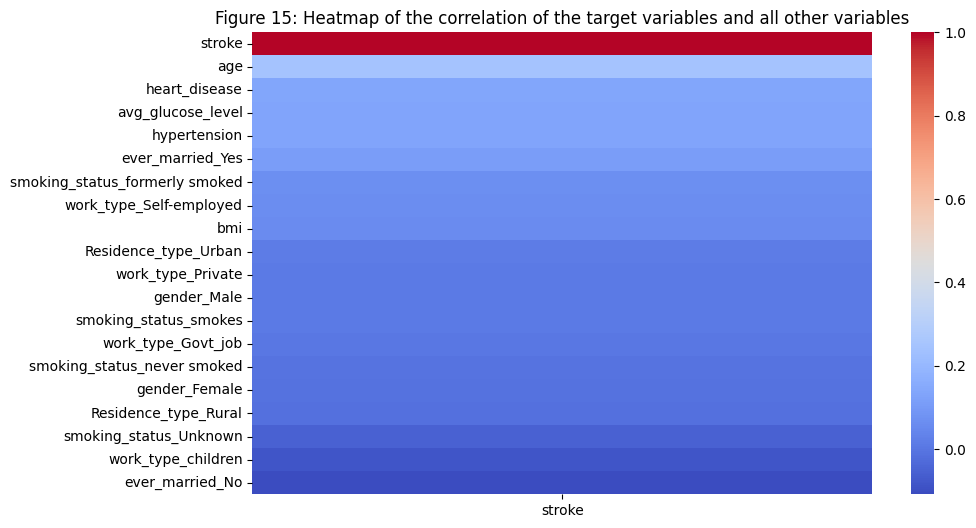

In [ ]:
#heat map of correlations of numerical variables with target variable
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr()[['stroke']].sort_values(by='stroke', ascending=False), cmap='coolwarm')
fig_num +=1
plt.title(f"Figure {fig_num}: Heatmap of the correlation of the target variables and all other variables")
plt.show()

In [ ]:
#correlations of variables with target variable
df_encoded.corr()[['stroke']].sort_values(by='stroke', ascending=False)

,stroke
stroke,1.000000
age,0.246478
heart_disease,0.134610
avg_glucose_level,0.133227
hypertension,0.131965
ever_married_Yes,0.108398
smoking_status_formerly smoked,0.065320
work_type_Self-employed,0.062643
bmi,0.056926
Residence_type_Urban,0.016494


In [ ]:
#!pip install imblearn

In [ ]:
# split information into dependent independent (X, y)
X = df_encoded.drop('stroke', axis=1) #define X
y = df_encoded['stroke'] #define y

Counter({0: 4733, 1: 248})


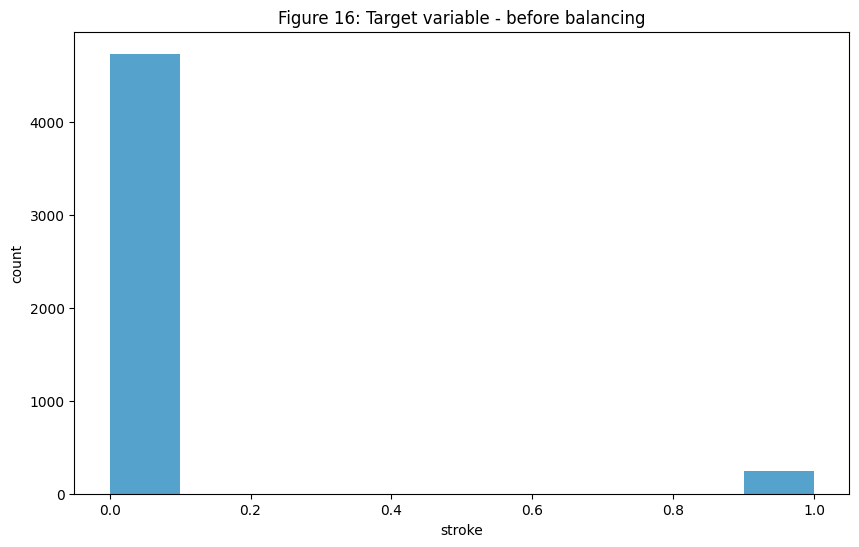

In [ ]:
#view imbalance of target variable

# summarize class distribution
print(Counter(y))

#plt histogram of distribution
plt.figure(figsize=(10,6))
plt.hist(y)
plt.xlabel('stroke')
plt.ylabel('count')
fig_num +=1
plt.title(f"Figure {fig_num}: Target variable - before balancing")
plt.show()

Counter({1: 4733, 0: 4733})


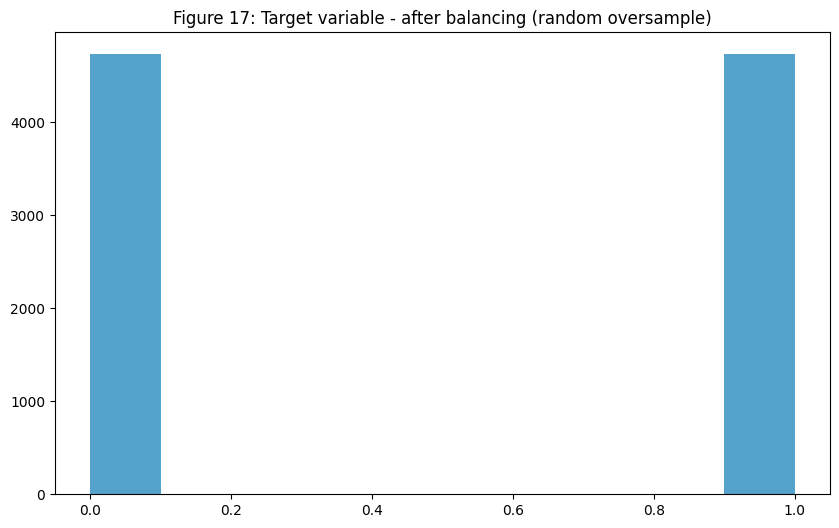

In [ ]:
#Random oversampling
random_os = RandomOverSampler(random_state=42)
X_random_os, y_random_os = random_os.fit_resample(X, y)

# summarize class distribution
print(Counter(y_random_os))

#view data distribution after oversampling
plt.figure(figsize=(10,6))
plt.hist(y_random_os)
fig_num +=1
plt.title(f"Figure {fig_num}: Target variable - after balancing (random oversample)")
plt.show()

In [ ]:
# split information into dependent independent (X, y)
X = X_random_os #define X
y =  y_random_os #define y

In [ ]:
#Train and test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [ ]:
#check shape of train and test to ensure there are no issues
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7099, 19), (2367, 19), (7099,), (2367,))

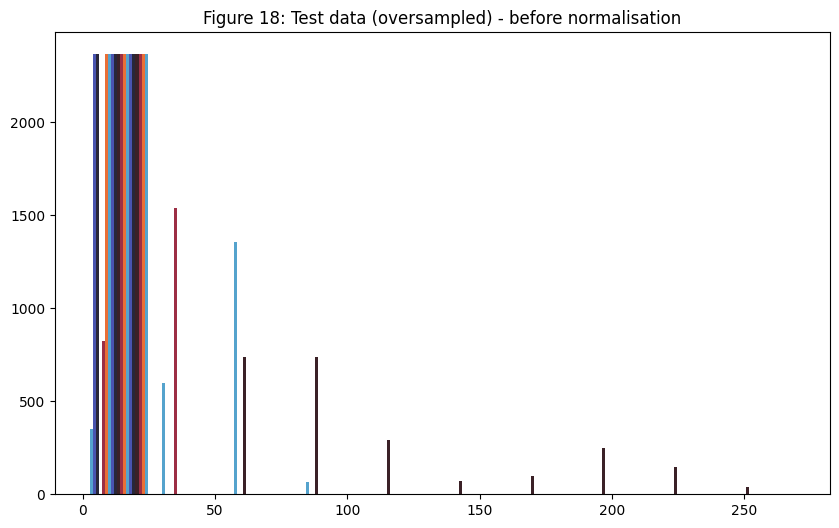

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(X_test)
fig_num +=1
plt.title(f"Figure {fig_num}: Test data (oversampled) - before normalisation")
plt.show()

In [ ]:
standard_scaler = StandardScaler() #model
X_train = standard_scaler.fit_transform(X_train)
X_test= standard_scaler.fit_transform(X_test)

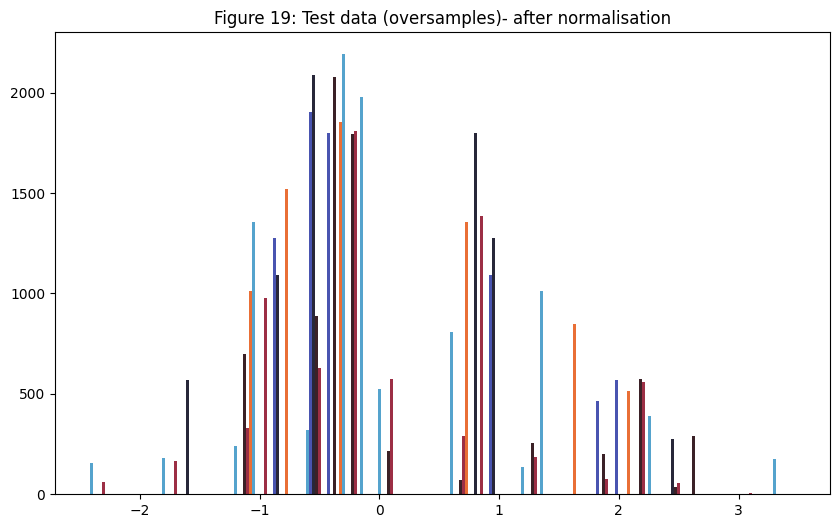

In [ ]:
#examine before standardize information
plt.figure(figsize=(10,6))
plt.hist(X_test)
fig_num +=1
plt.title(f"Figure {fig_num}: Test data (oversamples)- after normalisation")
plt.show()

In [ ]:
#create empty lists to store metrics of each model
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores= []
f1_scores = []

In [ ]:
def run_and_evaluate_model(model, model_name):
    """
    This function runs and evaluates a defined model.
    When the function is called:
        - features and target variable are fit to the model
        - predictions are collected
        - empty lists are created for each metric (accuracy score, precision score, recall score, f1 score)

        Next, the following are collected, and appended to their respective list:
            - accuracy score
            - precision score
            - recall score
            - f1 score

        Next, the following are produced and displayed:
            - classification report
            - confusion matrix
   """

    #global variable
    global fig_num #figure number to be used for created visuals (confusion matrices and graphs)

    #append model name to model_name list (to be used when creating a dataframe)
    model_names.append(model_name)

    #fit model and collect predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #print model name and information
    print(f"{model_name}")

    #get accuracy score and append accuracy score list
    acc_score = round(metrics.accuracy_score(y_test, y_pred), 3)
    accuracy_scores.append(acc_score)

    #get precision score and append precision score list
    prec_score = round(metrics.precision_score(y_test, y_pred), 3)
    precision_scores.append(prec_score)

    #get recall score and append recall score list
    rec_score = round(metrics.recall_score(y_test, y_pred), 3)
    recall_scores.append(rec_score)

    #get f1 score and append f1 score list
    f1_score = round(metrics.f1_score(y_test, y_pred), 3)
    f1_scores.append(f1_score)

    #classification report
    default_guess_unseen =model.predict(X_test)
    default_known_unseen = y_test
    print("Classification Report: \n\n",
          classification_report(default_known_unseen,
                                default_guess_unseen,
                                target_names=["Settles", "Defaults"]))

    #confusion matrix
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test,
                          predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels = [False, True])
    fig_num +=1
    disp.plot()
    plt.title(f"Figure {fig_num}: Confusion Matrix\n{model_name}")

In [ ]:
#Note: only n_neighbors will be changed to 45
(len(y_test))**0.5

48.65182422068057

In [ ]:
#K=45
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)


print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')

print('WITH K=45')
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")


F1 socre: 0.782
Accuracy socre: 0.768


WITH K=45


Confusion Matrix:
[[833 342]
 [207 985]]


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1175
           1       0.74      0.83      0.78      1192

    accuracy                           0.77      2367
   macro avg       0.77      0.77      0.77      2367
weighted avg       0.77      0.77      0.77      2367



In [ ]:
error_rate = [] #empty list to store error rates of each model

for i in range(1, 62, 2):
    knn = KNeighborsClassifier(n_neighbors=i) #defining the model
    knn.fit(X_train,y_train) #fitting the model to the training data
    pred_i = knn.predict(X_test) #running the model
    error_rate.append(np.mean(pred_i != y_test)) #appending the error_rate list with the error of each model

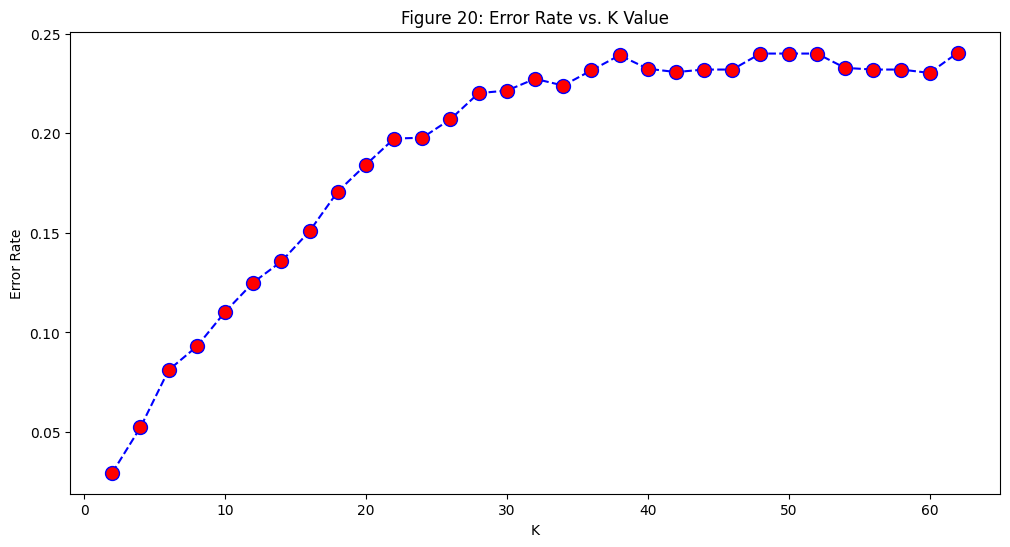

In [ ]:
#plot error rates of the KNN model with K values ranging from 1 to 60

plt.figure(figsize=(12,6))

plt.plot(
    range(2, 64, 2),
    error_rate,
    color='blue',
    linestyle='dashed',
    marker='o',
    markerfacecolor='red',
    markersize=10
)

fig_num +=1
plt.title(f'Figure {fig_num}: Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
(range(1, 62, 2))[0], error_rate[0] #error rate at k=1

(1, 0.029573299535276723)

In [ ]:
(range(1, 62, 2))[22], error_rate[22] #error rate at k=45

(45, 0.23193916349809887)

In [ ]:
#K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)


print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print('WITH K=1')
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.971
Accuracy socre: 0.97


WITH K=1


Confusion Matrix:
[[1105   70]
 [   0 1192]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1175
           1       0.94      1.00      0.97      1192

    accuracy                           0.97      2367
   macro avg       0.97      0.97      0.97      2367
weighted avg       0.97      0.97      0.97      2367



In [ ]:
#define hyperparameter search space
param_grid_knn = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_jobs': [None, -1]
}

#create the KNN model
knn = KNeighborsClassifier(n_neighbors=1)

#create the GridSearchCV object
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)

#fit the GridSearchCV object to the data
grid_knn.fit(X_train, y_train)

# print the best hyperparameters and corresponding accuracy score
print(f"Best hyperparameters: {grid_knn.best_params_}")
print(f"Best accuracy score: {grid_knn.best_score_}")

Best hyperparameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': None, 'weights': 'uniform'}
Best accuracy score: 0.9649247138929418


In [ ]:
#K-nearest neighbour (KNN) classification model
#K=1, and tuned hyperparameters

knn = KNeighborsClassifier(
    n_neighbors=1,
    metric='euclidean',
    weights='uniform',
    n_jobs=None,
    algorithm='auto'
)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print('with K=1, and tuned hyperparameters')
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.971
Accuracy socre: 0.97


with K=1, and tuned hyperparameters


Confusion Matrix:
[[1105   70]
 [   0 1192]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1175
           1       0.94      1.00      0.97      1192

    accuracy                           0.97      2367
   macro avg       0.97      0.97      0.97      2367
weighted avg       0.97      0.97      0.97      2367



K-Nearest Neighbours Classifier
Classification Report: 

               precision    recall  f1-score   support

     Settles       1.00      0.94      0.97      1175
    Defaults       0.94      1.00      0.97      1192

    accuracy                           0.97      2367
   macro avg       0.97      0.97      0.97      2367
weighted avg       0.97      0.97      0.97      2367



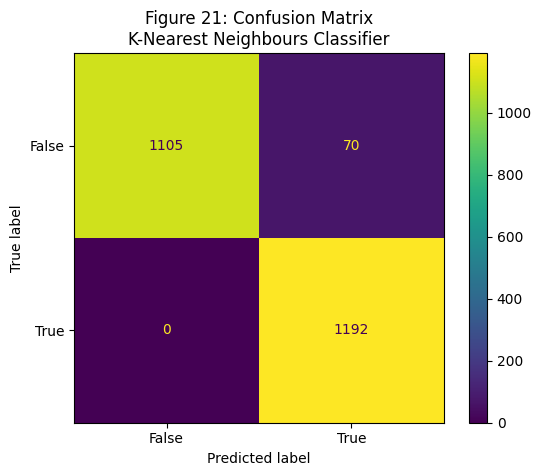

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
run_and_evaluate_model(knn, 'K-Nearest Neighbours Classifier')

In [ ]:
#random forest model with default parameter values and a random state of 42
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.983
Accuracy socre: 0.983


Confusion Matrix:
[[1150   25]
 [  15 1177]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1175
           1       0.98      0.99      0.98      1192

    accuracy                           0.98      2367
   macro avg       0.98      0.98      0.98      2367
weighted avg       0.98      0.98      0.98      2367



In [ ]:
 #define hyperparameter search space
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'n_jobs': [None, -1]
}

#create a RandomForestClassifier object
rf = RandomForestClassifier(random_state=42)

#create a GridSearchCV object
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)

#Fit the GridSearchCV object to the data
grid_rf.fit(X_train, y_train)

#print the best hyperparameters
print("Best parameters: ", grid_rf.best_params_)
print("Best score: ", grid_rf.best_score_)

Best parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'n_jobs': None}
Best score:  0.9853496312618487


In [ ]:
#random forest model with best parameter values and a random state of 42
rf = RandomForestClassifier(
    random_state=42,
    n_estimators=50,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    n_jobs=None
)

rf.fit(X_train,y_train)
pred = rf.predict(X_test)


print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.985
Accuracy socre: 0.984


Confusion Matrix:
[[1151   24]
 [  13 1179]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1175
           1       0.98      0.99      0.98      1192

    accuracy                           0.98      2367
   macro avg       0.98      0.98      0.98      2367
weighted avg       0.98      0.98      0.98      2367



Random Forest Classifier
Classification Report: 

               precision    recall  f1-score   support

     Settles       0.99      0.98      0.98      1175
    Defaults       0.98      0.99      0.98      1192

    accuracy                           0.98      2367
   macro avg       0.98      0.98      0.98      2367
weighted avg       0.98      0.98      0.98      2367



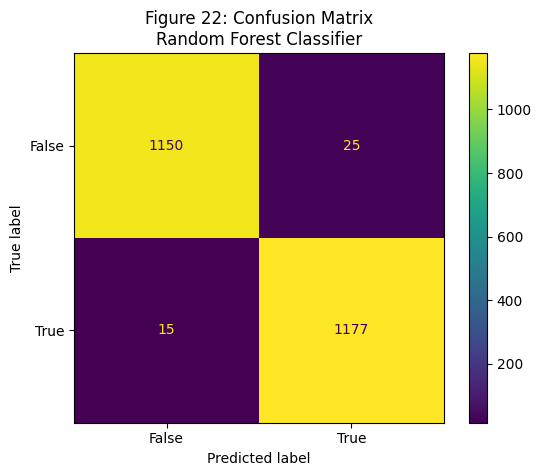

In [ ]:
rf = RandomForestClassifier(random_state=42)
run_and_evaluate_model(rf, 'Random Forest Classifier')

In [ ]:
#decision tree classification model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.849
Accuracy socre: 0.863


Confusion Matrix:
[[1130   45]
 [ 280  912]]


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1175
           1       0.95      0.77      0.85      1192

    accuracy                           0.86      2367
   macro avg       0.88      0.86      0.86      2367
weighted avg       0.88      0.86      0.86      2367



In [ ]:
#define hyperparameter search space
param_grid_dtree = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 8, 10, 12],
    'min_samples_split': [2, 4, 6, 8, 10, 12],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': [None, 4, 12, 20, 30]
}

#create a DecisionTreeClassifier object
dtree = DecisionTreeClassifier(random_state=42)

#create a GridSearchCV object
grid_dtree = GridSearchCV(dtree, param_grid_dtree, cv=5)

#fit the GridSearchCV object to the data
grid_dtree.fit(X_train, y_train)

#print the best hyperparameters
print("Best parameters: ", grid_dtree.best_params_)
print("Best score: ", grid_dtree.best_score_)

Best parameters:  {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 8}
Best score:  0.9645017816554011


In [ ]:
#decision tree model with best parameter values and a random state of 42
dtree = DecisionTreeClassifier(
    random_state=42,
    max_depth=None,
    min_samples_leaf=8,
    min_samples_split=2,
    max_features=None,
    max_leaf_nodes=None)

dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.848
Accuracy socre: 0.853


Confusion Matrix:
[[1048  127]
 [ 221  971]]


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1175
           1       0.88      0.81      0.85      1192

    accuracy                           0.85      2367
   macro avg       0.86      0.85      0.85      2367
weighted avg       0.86      0.85      0.85      2367



Decision Tree Classifier
Classification Report: 

               precision    recall  f1-score   support

     Settles       0.83      0.89      0.86      1175
    Defaults       0.88      0.81      0.85      1192

    accuracy                           0.85      2367
   macro avg       0.86      0.85      0.85      2367
weighted avg       0.86      0.85      0.85      2367



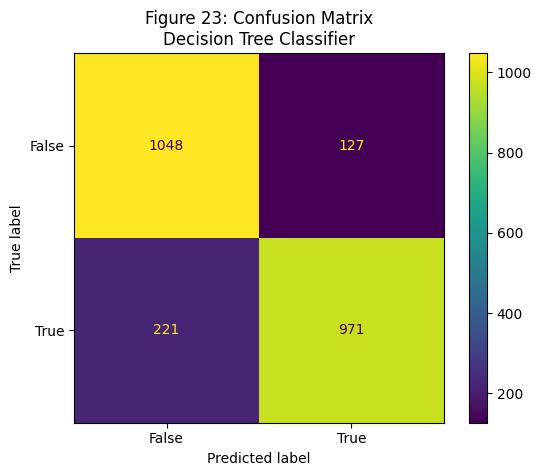

In [ ]:
dtree = DecisionTreeClassifier(
    random_state=42,
    max_depth=None,
    min_samples_leaf=8,
    min_samples_split=2,
    max_features=None,
    max_leaf_nodes=None)

run_and_evaluate_model(dtree, 'Decision Tree Classifier')

In [ ]:
#support vector machine (SVM) classification model
svm = SVC(random_state=42)
svm.fit(X_train,y_train)
pred = svm.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.841
Accuracy socre: 0.831


Confusion Matrix:
[[ 908  267]
 [ 134 1058]]


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1175
           1       0.80      0.89      0.84      1192

    accuracy                           0.83      2367
   macro avg       0.83      0.83      0.83      2367
weighted avg       0.83      0.83      0.83      2367



In [ ]:
#define hyperparameter search space
param_grid_svm = {
    'kernel': ['linear', 'rbf'], #, 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1, 10],
#     'probability': [True, False]
}

#create a RandomForestClassifier object
svm = SVC(random_state=42)

#create a GridSearchCV object
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5)

#Fit the GridSearchCV object to the data
grid_svm.fit(X_train, y_train)

#print the best hyperparameters
print("Best parameters: ", grid_svm.best_params_)
print("Best score: ", grid_svm.best_score_)

Best parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.879839998411895


In [ ]:
#SVM model with best parameter values and a random state of 42
svm = SVC(
    random_state=42,
    kernel= 'rbf',
    gamma= 'scale',
    C=10
)

svm.fit(X_train,y_train)
pred = svm.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.895
Accuracy socre: 0.887


Confusion Matrix:
[[ 964  211]
 [  56 1136]]


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1175
           1       0.84      0.95      0.89      1192

    accuracy                           0.89      2367
   macro avg       0.89      0.89      0.89      2367
weighted avg       0.89      0.89      0.89      2367



Support Vector Machine Classifier
Classification Report: 

               precision    recall  f1-score   support

     Settles       0.95      0.82      0.88      1175
    Defaults       0.84      0.95      0.89      1192

    accuracy                           0.89      2367
   macro avg       0.89      0.89      0.89      2367
weighted avg       0.89      0.89      0.89      2367



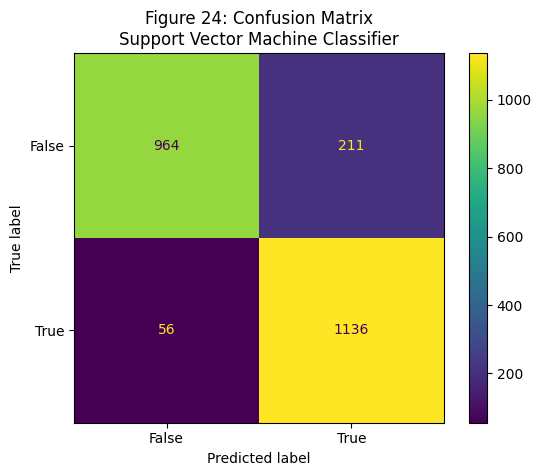

In [ ]:

svm = SVC(
    random_state=42,
    kernel= 'rbf',
    gamma= 'scale',
    C=10
)

run_and_evaluate_model(svm, 'Support Vector Machine Classifier')

In [ ]:
#logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.801
Accuracy socre: 0.793


Confusion Matrix:
[[888 287]
 [204 988]]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1175
           1       0.77      0.83      0.80      1192

    accuracy                           0.79      2367
   macro avg       0.79      0.79      0.79      2367
weighted avg       0.79      0.79      0.79      2367



In [ ]:
#define hyperparameter search space
param_grid_log_reg = {
    'solver': ['lbfgs', 'newton-cholesky'],
    'n_jobs': [None, -1],
    'C': [0.1, 1, 10],
    'max_iter': [100, 500, 1000],
    'multi_class': ['auto', 'ovr','multinominal']
}

#create a LogisticRegression object
log_reg = LogisticRegression(random_state=42)

#create a GridSearchCV object
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)

#Fit the GridSearchCV object to the data
grid_log_reg.fit(X_train, y_train)

#print the best hyperparameters
print("Best parameters: ", grid_log_reg.best_params_)
print("Best score: ", grid_log_reg.best_score_)

Best parameters:  {'C': 0.1, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'solver': 'lbfgs'}
Best score:  0.7733460381740762


In [ ]:
#Logistic regression with best parameter values and a random state of 42
log_reg = LogisticRegression(
    random_state=42,
    solver='lbfgs',
    n_jobs=None,
    C=0.1,
    max_iter=100,
    multi_class='auto'
)

log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.803
Accuracy socre: 0.794


Confusion Matrix:
[[887 288]
 [200 992]]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1175
           1       0.78      0.83      0.80      1192

    accuracy                           0.79      2367
   macro avg       0.80      0.79      0.79      2367
weighted avg       0.80      0.79      0.79      2367



Logistic Regression
Classification Report: 

               precision    recall  f1-score   support

     Settles       0.81      0.76      0.78      1175
    Defaults       0.77      0.83      0.80      1192

    accuracy                           0.79      2367
   macro avg       0.79      0.79      0.79      2367
weighted avg       0.79      0.79      0.79      2367



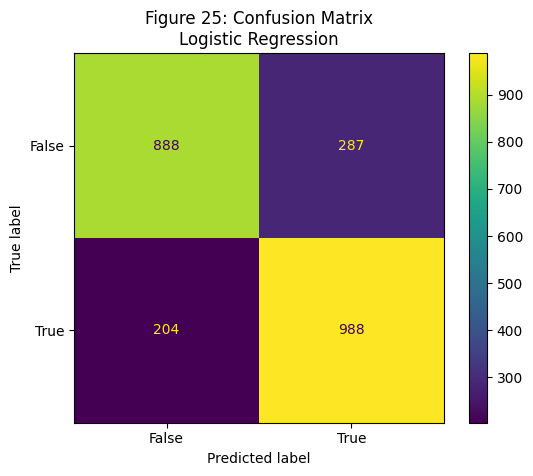

In [ ]:
log_reg = LogisticRegression(random_state=42)
run_and_evaluate_model(log_reg, 'Logistic Regression')

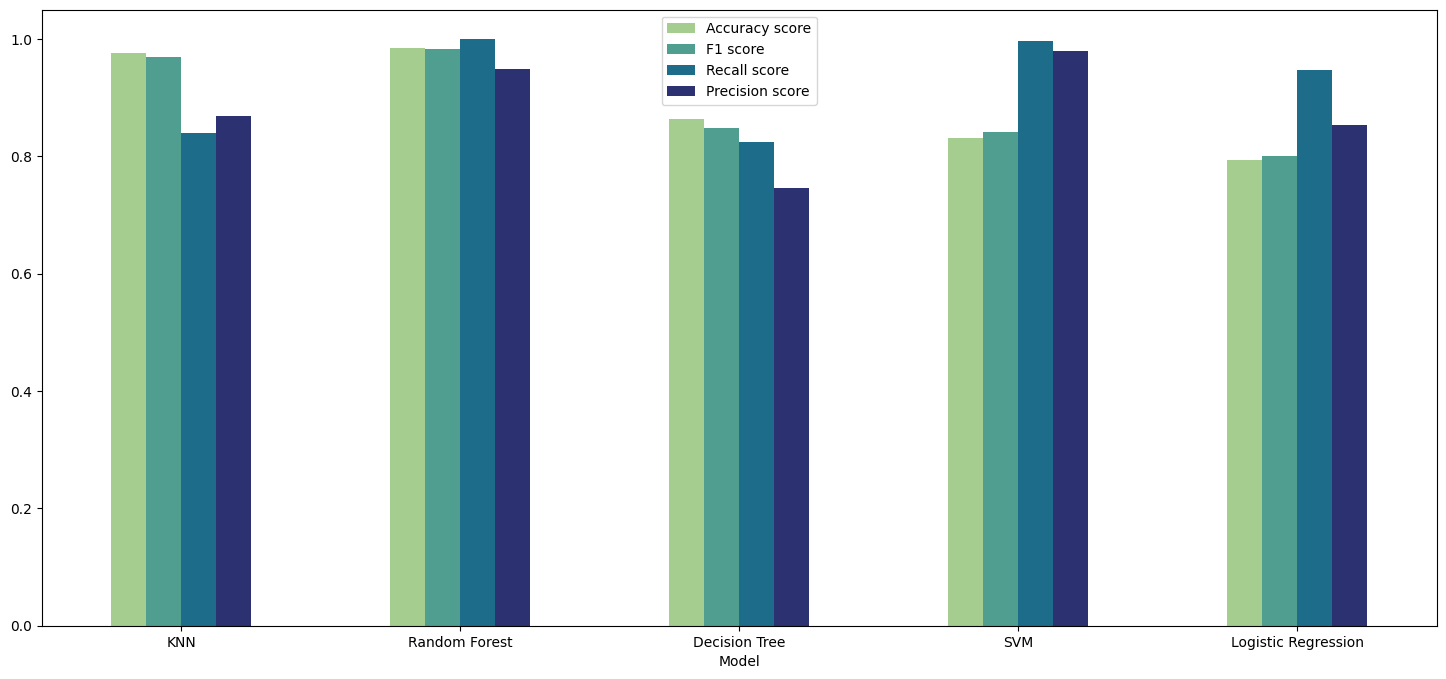

In [ ]:
#create dataframe for metrics

#dataframe dictorionary
df=pd.DataFrame({
    'Model' : ['KNN','Random Forest','Decision Tree','SVM','Logistic Regression'],
    'Accuracy score' : [0.976,0.984,0.863,0.831,0.793],
    'F1 score' :[0.97,0.983,0.849,0.841,0.801],
    'Recall score' :[0.84,1.0,0.824,0.996,0.947],
    'Precision score' : [0.869,0.949,0.746,0.98,0.854]

})
df.plot(x="Model", y=["Accuracy score", "F1 score","Recall score","Precision score"], kind="bar",figsize=(18, 8), rot=0, cmap='crest')
plt.show()

In [ ]:
df_unseen = pd.read_csv('/content/drive/MyDrive/brainstoke/brain_stroke.csv')

In [ ]:
#create OneHotEncoder instance with sparse=False
onehot_encoder = OneHotEncoder(sparse=False)

#fit and transform the categorical columns using OneHotEncoder
df_unseen_encoded = pd.DataFrame(
    onehot_encoder.fit_transform(df_unseen[cat_cols_object]),
    columns = onehot_encoder.get_feature_names_out(cat_cols_object)
)

# Concatenate the one hot encoded columns with the original dataframe
df_unseen_encoded = pd.concat(
    [df_unseen.drop(columns = cat_cols_object), df_unseen_encoded],
    axis = 1
)

df_unseen_encoded.head() #display first five rows of new dataframe

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,81.0,0,0,186.21,29.0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


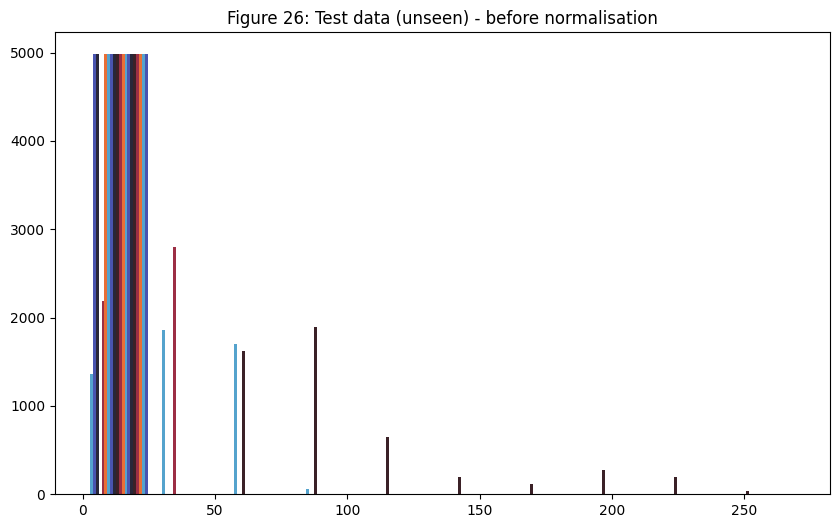

In [ ]:
#examine before standardize information
plt.figure(figsize=(10,6))
plt.hist(df_unseen_encoded)
fig_num +=1
plt.title(f"Figure {fig_num}: Test data (unseen) - before normalisation")
plt.show()

In [ ]:
standard_scaler = StandardScaler() #model
X_test = standard_scaler.fit_transform(df_unseen_encoded)

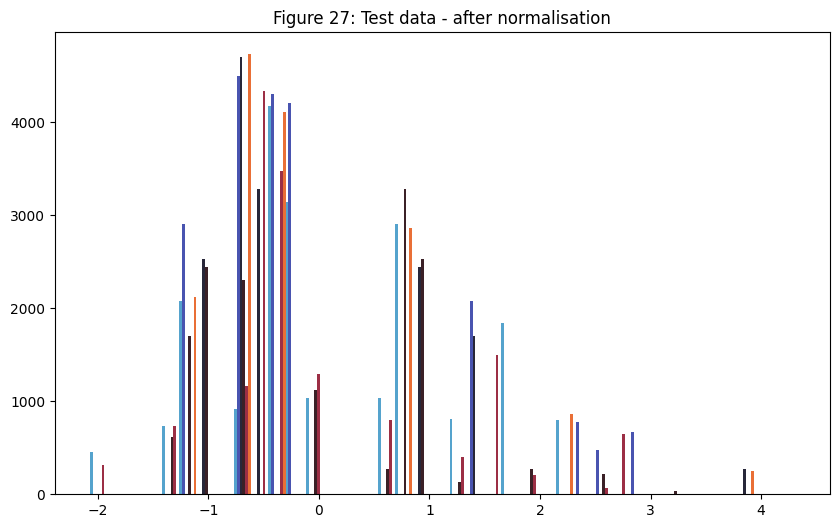

In [ ]:
#examine before standardize information
plt.figure(figsize=(10,6))
plt.hist(X_test)
fig_num +=1
plt.title(f"Figure {fig_num}: Test data - after normalisation")
plt.show()
